<a href="https://colab.research.google.com/github/JiSu0708/ESAA-YB/blob/main/0414_%EA%B3%BC%EC%A0%9C(ESAA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**파이썬 머신러닝 완벽 가이드** ch3.1 ~ 5  pg.147~174

- 모듈 improt & 데이터 불러오기

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [7]:
diabetes_data=pd.read_csv('diabetes.csv')

- Outcome 클래스 결정값의 분포 & 데이터의 개략적 확인

In [12]:
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


=> Negative 값 0: 500개, Positive 값 1: 268개

=> Negative가 상대적으로 많다.

- feature 타입 & Null 개수

In [13]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


=> Null 값은 없고, feature 타입은 모두 숫자형 

=> feature 인코딩 필요 없음.

- 로지스틱 회귀를 이용한 예측 모델 생성

> 1. 데이터 세트를 feature/class 데이터 세트로 나눔
2. train/test 데이터 세트로 분리
3. 로지스틱 회귀 이용해 예측 수행
4. 유틸리티 함수(get_clf_eval(),get_eval_by_threshold(),precision_recall_curve_plot()) 이용해 성능 평가 지표 출력
5. 재현율 곡선 시각화

In [26]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc)) 

In [15]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝이 Outcome 칼럼으로 레이블 값임, 칼럼 위치 -1을 이용해 추출
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741, F1: 0.6392, AUC: 0.7919


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=> 예측 정확도: 77.27%, 재현율: 59.26%로 측정됨.
- 전체 데이터의 65%가 Negative이므로 정확도 보다는 **재현율** 성능에 조금 더 초점을 맞춰 보겠다.

- 정밀도 재현율 곡선
> - 임곗값별 정밀도 & 재현율 값의 변화 확인
  - precision_recall_curve_plot() 함수 이용

In [16]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  plt.figure(figsize=(8, 6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recall value')
  plt.legend()

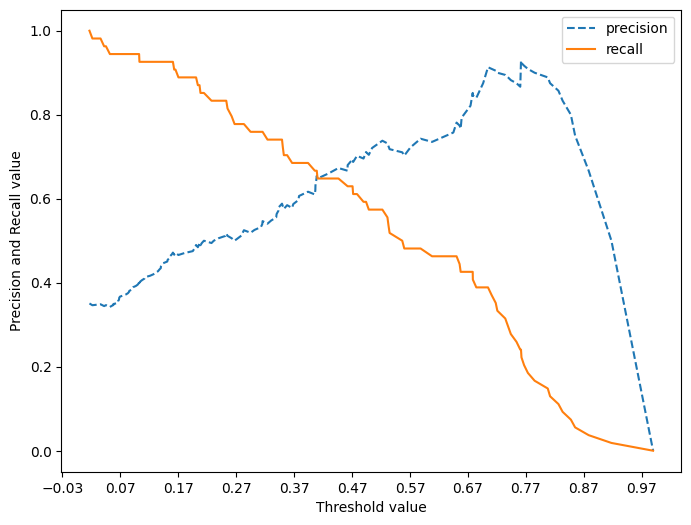

In [17]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

=> 재현율 곡선 -> 임곗값을 0.42 정도로 낮추면 정밀도와 재현율이 어느 정도 균형을 맞출 것 같다.

But, 두 개의 지표 모두 0.7이 안 되는 수치로 보임. (여전히 값이 낮음).

=> 임곗값을 인위적으로 조작하기 전에 다시 데이터 값 점검


- 원본 데이터 DataFrame의 describe() 메서드 호출해 feature 값의 분포도 살펴보기

In [18]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


=> diabetes_data.describe() 데이터 값을 보면 min() 값이 0으로 되어 있는 feature가 상당히 많다.

ex. Glucose- 포도당 수치인데 min 값이 0인 것은 말이 되지 않음. 

But, Glucose feature의 히스토그램을 확인해보면 0 값이 일정 수준 존재하는 것을 알 수 있음.


- Glucose feature의 히스토그램

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

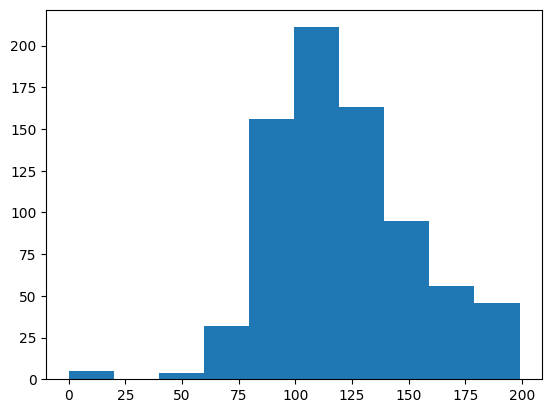

In [19]:
plt.hist(diabetes_data['Glucose'], bins=10)

=> min() 값이 0으로 되어 있는 feature에 대해 

-  0 값의 건수 & 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인

> 확인할 feature: Glucose, BloodPressure, SkinThickness, Insulin, BMI  
	\* Pregnacise는 출산 횟수를 의미하므로 제외함.


In [20]:
# 0값을 검사할 피처 명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count,
                                                      100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


=> SkinTickness, Insulin의 0 값은 각각 전체의 29.56%, 48.7%로 대단히 많다.

But, 전체 데이터 건수가 많지 않기 때문에 이들 데이터를 일괄적으로 삭제할 경우 학습을 효과적으로 수행하기 어려우.

=> 위 feature의  0 값을 **평균값**으로 대체!

In [21]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0 값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

- 0 값을 평균값으로 대체한 데이터 세트에 feature scaling 적용해 변환

\* 로지스틱 회귀의 경우 일반적으로 숫자 데이터에 스케일링을 적용하는 것이 좋다.

-  다시 train/test 데이터 세트로 나누고 로지스틱 회귀 적용해 성능 평가 지표 확인

In [22]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433


=> 데이터 변환 & 스케일링(Scaling) 통해 성능 수치가 일정 수준 개선됨.

\* 하이퍼 파라미터에 대한 튜닝 생략.

=> 여전히 재현율 수치는 개선이 필요해 보임.

- 분류 결정 임곗값을 변화시키면서 재현율 값의 성능 수치가 어느 정도 개선되는지 확인

In [23]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_tst, pred_proba_c1, thresholds):
  # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test, custom_predict, pred_proba_c1)

> - 임곗값을 0.3 ~ 0.5까지 0.03씩 변화시키면서 ㅐㅈ현율과 다른 평가 지표의 값 변화 출력
- 임곗값에 따른 평가 수치 출력은 앞에서 사용한 get_eval_by_threshold() 함수 이용

In [24]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963, F1: 0.6615, AUC: 0.8433
임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778, F1: 0.6774, AUC: 0.8433
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1: 0.6667, AUC: 0.8433
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1: 0.6667, AUC: 0.8433
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1: 0.6792, AUC: 0.8433
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1: 0.6857, AUC: 0.8433
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8433
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433


- Output 정리

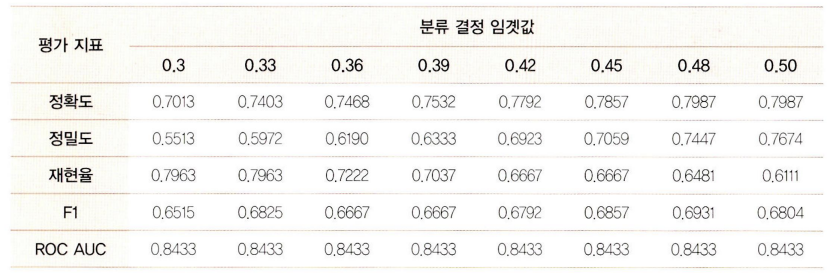


=> 위 표를 근거로 하면 정확도와 정밀도를 희생하고 재현율을 높이는 데 가장 좋은 임곗값은 0.33으로, 재현율 값이 0.7963

But, 정밀도가 0.5972로 매우 저조해졌으니 극단적인 선택으로 보임.

=> 임곗값 0.48이 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 좋은 임곗값으로 보임.

임곗값: 0.48 -> 정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1 스코어: 0.6931, ROC AUC: 0.8433

- 앞에서 학습된 로지스틱 회귀 모델 이용해 임곗값을 0.48로 낮춘 상태에서 다시 예측 수행
> - 사이킷런의 predict() 메서드는 임곗값을 마음대로 변환할 수 없으므로 별도의 로직으로 이를 구해야 함.   
  => Binarizer 클래스를 이용해 predict_proba()로 추출한 예측 결과 확률값을 반환해 변경된 임곗값에 따른 예측 클래스의 값 구해 보겠음.


In [25]:
# 임곗값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8433


## 정리

**분류에 사용되는 성능 평가 지표**
- 정확도
- 오차 행렬
- 정밀도
- 재현율
- F1 스코어
- ROC - AUC

#### 1. 정확도

이진 분류의 레이블 값이 불균형하게 분포될 경우(0이 매우 많고 1이 매우 적을 경우 또는 반대의 경우) 

-> 정확도(단순히 예측 결과와 실제 결과가 일치하는 지표)만으로 머신러닝 모델의 예측 성능을 평가할 수 없다.

#### 2. 오차 행렬

- Negative/Positive 값을 가지는 실제 클래스 값과 예측 클래스 값이 True/False에 따라 TN, FP, FN, TP로 매핑되는 4분면 행렬을 기반으로 예측 성능 평가
- 정확도, 정밀도, 재현율 수치는 TN, FP, FN, TP 값을 다양하게 결합해 만들어지고, 이를 통해 분류 모델 예측 성능의 오류가 어떠한 모습으로 발생하는지 알 수 있다.

#### 3. 정밀도(Pricision), 재현율(Recall)

- Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
- 특히 **재현율**이 상대적으로 더 중요한 지표인 경우: 

실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 (ex. 암 성능 예측 모델)
- 분류하려는 업무이 특성상 정밀도 or 재현율이 특별히 강조되어야 할 경우

=> 분류의 결정 임곗값(Threshold)을 조정해 정밀도 or 재현율의 수치를 높인다.

#### 4. F1 스코어
- 정밀도 + 재현율을 결합한 평가 지표
- 정밀도와 재현율이 어느 한쪽으로 치우치지 안을 때 높은 지표값을 가지게 됨.


#### 5. ROC-AUC
- 일반적으로 이진 분류의 성능 평가를 위해 가장 많이 사용되는 지표
- AUC(Area Under Curve) 값: ROC 곡선 밑의 면적을 구한 것 -> 일반적으로 1에 가까울수록 좋은 수치